# Funciones de distribucion de probabilidad

## Distribucion Uniforme

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt

In [13]:
a=1 #Limite inferior 
b=100 # limite superior
n=1500000 #necesita una miestra muy grande
#Todos son igual de probables
datos = np.random.uniform(a,b,n)

(array([150015., 149916., 150115., 150077., 149976., 150134., 149742.,
        149741., 150337., 149947.]),
 array([ 1.00002905, 10.90002567, 20.80002229, 30.70001891, 40.60001553,
        50.50001215, 60.40000877, 70.30000539, 80.20000201, 90.09999863,
        99.99999525]),
 <a list of 10 Patch objects>)

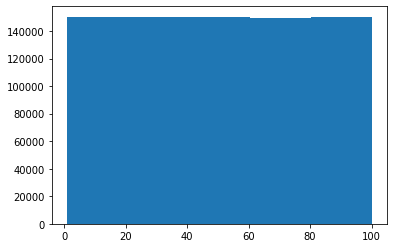

In [14]:
%matplotlib inline
plt.hist(datos)

(array([30327., 29770., 29914., 30324., 29981., 30047., 30139., 29887.,
        29760., 29851.]),
 array([ 1.00012932, 10.90011432, 20.80009931, 30.70008431, 40.60006931,
        50.5000543 , 60.4000393 , 70.30002429, 80.20000929, 90.09999428,
        99.99997928]),
 <a list of 10 Patch objects>)

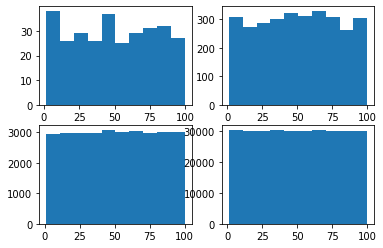

In [22]:
figure, axs = plt.subplots(2,2)
a=1
b=100
n1 = 300
n2 = 3000
n3 = 30000
n4 = 300000
axs[0][0].hist(np.random.uniform(1,b,n1))
axs[0][1].hist(np.random.uniform(1,b,n2))
axs[1][0].hist(np.random.uniform(1,b,n3))
axs[1][1].hist(np.random.uniform(1,b,n4))



## Distribucion Normal

In [23]:
data = np.random.randn(100)

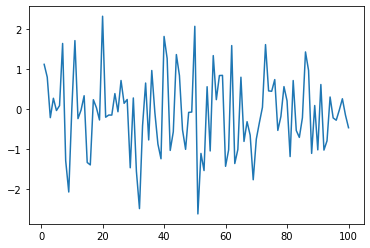

In [24]:
x = range(1,101)
plt.plot(x,data)

(array([ 2.,  2., 10., 16., 16., 25., 13.,  6.,  8.,  2.]),
 array([-2.63126365, -2.13682606, -1.64238848, -1.14795089, -0.6535133 ,
        -0.15907571,  0.33536188,  0.82979946,  1.32423705,  1.81867464,
         2.31311223]),
 <a list of 10 Patch objects>)

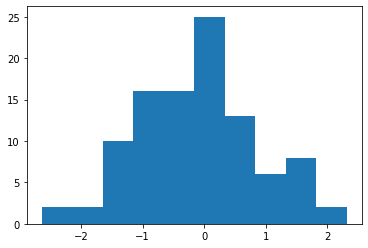

In [25]:
plt.hist(data)

(array([2.0000e+01, 3.6300e+02, 3.4540e+03, 1.4891e+04, 3.0443e+04,
        3.1080e+04, 1.5573e+04, 3.7210e+03, 4.3400e+02, 2.1000e+01]),
 array([-4.39758347, -3.52197829, -2.64637311, -1.77076793, -0.89516275,
        -0.01955757,  0.85604761,  1.73165279,  2.60725797,  3.48286315,
         4.35846833]),
 <a list of 10 Patch objects>)

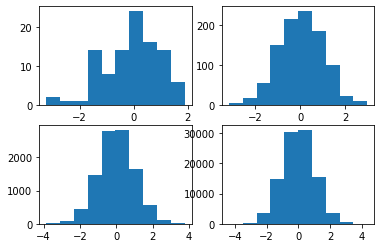

In [26]:
figure, axs = plt.subplots(2,2)
a=1
b=100
n1 = 300
n2 = 3000
n3 = 30000
n4 = 300000
axs[0][0].hist(np.random.randn(100))
axs[0][1].hist(np.random.randn(1000))
axs[1][0].hist(np.random.randn(10000))
axs[1][1].hist(np.random.randn(100000))

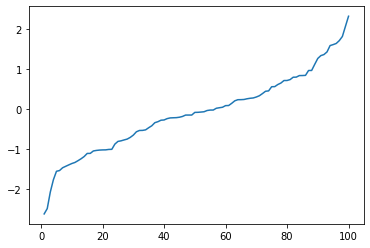

In [27]:
plt.plot(x,sorted(data))

(array([  26.,  163.,  714., 1781., 2767., 2666., 1342.,  438.,   91.,
          12.]),
 array([-3.52181907, -1.65217148,  0.21747611,  2.08712369,  3.95677128,
         5.82641887,  7.69606646,  9.56571405, 11.43536163, 13.30500922,
        15.17465681]),
 <a list of 10 Patch objects>)

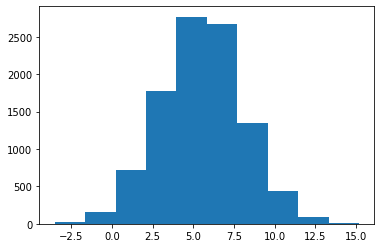

In [29]:
#Teorema central del limite
mu = 5.5
sd = 2.5 #Mayor dispersion de los datos
Z = np.random.randn(10000)
data = mu + sd*Z # Z = (X-mu) / sd -> N(0,1), X = mu + sd * Z
plt.hist(data)

In [30]:
data = np.random.randn(2,4)
data

array([[-1.18831545,  0.66890205, -1.24195078, -0.01733791],
       [ 0.25363869, -0.00656321, -0.37496957, -0.22026441]])

## La simulacion de Monte Carlo

* Generamos dos numeros aleatorios uniforme entre 0 y 1 en total n veces
* Calcularemos x * x + y * y
  * Si el valor es inferior a 1 -> Estamos dentro del circulo
  * Si el valor es superior a 1 -> Estamos fuera del circulo
* Calculamos el numero total de veces que estan dentro ddel circulo y lo dividimos entre el numero de intentos para obtener una aproximacion de la probabilidad de caer dentro del circulo
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un numero sufuciente de veces (100), para obtener (100) diferentes aproximaciones de π.
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.

In [37]:
def pi_MonteCarlo(n,nexp):
    pi_prom = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            Z = np.sqrt(x[j]*x[j] + y[j]*y[j])
            if Z <= 1:
                value+=1
        float_value = float(value)
        pi_value = float_value*4 / n
        pi_value_list.append(pi_value)
        pi_prom += pi_value
    pi = pi_prom/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi,fig)
        

3.1441199999999996


(3.1441199999999996, [<matplotlib.lines.Line2D at 0x11f6b00b8>])

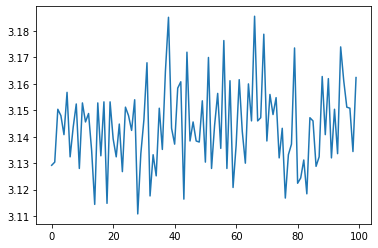

In [38]:
pi_MonteCarlo(10000,200)

## Dummy Data Sets

In [42]:
n=100
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 *np.random.randn(n),
        'C' : np.random.uniform(5,32,n)
    }
)

In [43]:
data.describe()

,A,B,C
count,100.000000,100.000000,100.000000
mean,-0.120438,1.188247,18.570627
std,1.107904,2.622366,7.435514
min,-3.382014,-6.814399,5.195424
25%,-0.734211,-0.395628,12.901510
50%,0.044633,1.277995,19.060620
75%,0.613819,3.181473,24.843635
max,2.023588,7.142328,31.885679


(array([ 3.,  1.,  4.,  9., 10., 17., 22., 17., 12.,  5.]),
 array([-3.38201426, -2.841454  , -2.30089374, -1.76033347, -1.21977321,
        -0.67921295, -0.13865269,  0.40190757,  0.94246784,  1.4830281 ,
         2.02358836]),
 <a list of 10 Patch objects>)

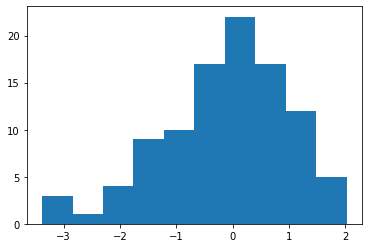

In [44]:
plt.hist(data["A"])

(array([ 1.,  2.,  5.,  7., 18., 24., 16., 17.,  7.,  3.]),
 array([-6.81439916, -5.41872642, -4.02305368, -2.62738093, -1.23170819,
         0.16396455,  1.55963729,  2.95531003,  4.35098278,  5.74665552,
         7.14232826]),
 <a list of 10 Patch objects>)

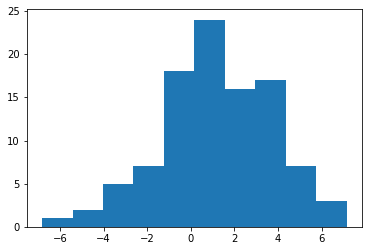

In [45]:
plt.hist(data["B"])

(array([ 8.,  9., 11.,  8., 12., 15.,  8., 12.,  7., 10.]),
 array([ 5.19542409,  7.8644496 , 10.53347512, 13.20250064, 15.87152615,
        18.54055167, 21.20957719, 23.8786027 , 26.54762822, 29.21665373,
        31.88567925]),
 <a list of 10 Patch objects>)

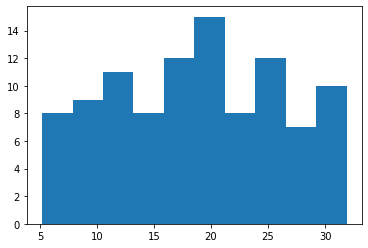

In [46]:
plt.hist(data["C"])

In [49]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [50]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [51]:
colum_names = data.columns.values.tolist()

In [52]:
a = len(colum_names)
a

21

In [54]:
new_data = pd.DataFrame(
    {
        'Colum Name': colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    },index = range(42,42+a)
)

In [55]:
new_data

,Colum Name,A,B
42,State,0.418190,0.025376
43,Account Length,-1.759684,0.500073
44,Area Code,1.465799,0.102660
45,Phone,-0.235361,0.738107
46,Int'l Plan,0.123192,0.151892
47,VMail Plan,-0.475788,0.041573
48,VMail Message,0.359014,0.867139
49,Day Mins,0.367458,0.157887
50,Day Calls,0.106280,0.636659
51,Day Charge,0.961460,0.456264
